### NEW

Layer: [8]
Run: 0
checking DeepBSpline(mode=fc, num_activations=8, init=relu, size=3, grid=1.0.)
Not zeroed:  tensor([ 0.0066, -0.0041,  0.9840])  with score  tensor(0.9947)
Not zeroed:  tensor([ 0.0062, -0.0066,  0.9947])  with score  tensor(1.0074)
Not zeroed:  tensor([ 0.0144, -0.0160,  1.0375])  with score  tensor(1.0679)


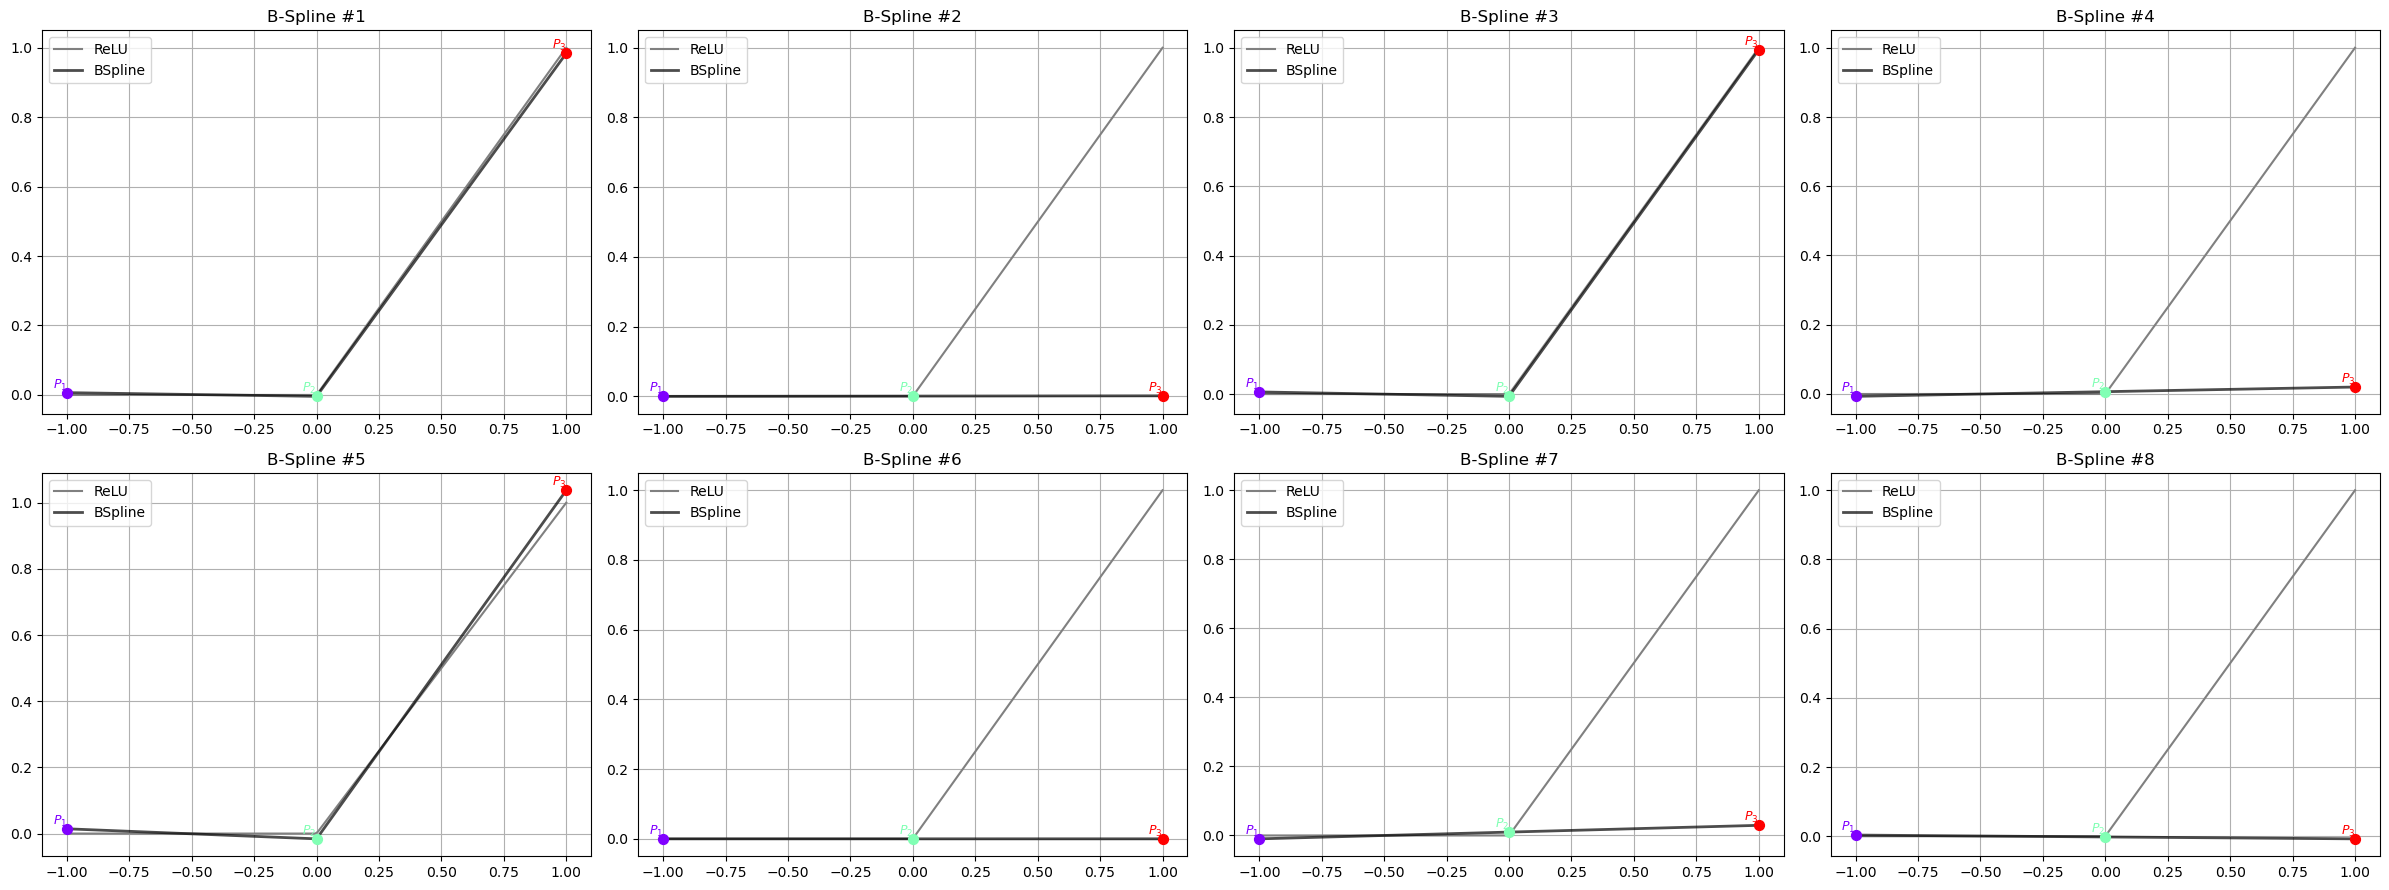

In [2]:
import utils, importlib
importlib.reload(utils)

locs,coeffs = utils.train_models_count_zeroed_AFs(
    runs = 1,
    layers=[[8]], 
    epochs={"relu": 150, "both": 0, "bspline": 10}
)

layer_to_plot = 0
utils.plot_bsplines(locs[layer_to_plot], coeffs[layer_to_plot], 4)

In [8]:
import utils, importlib
importlib.reload(utils)

utils.train_models_count_zeroed_AFs(
    runs = 10,
    layers=[[8], [24, 8], [24, 48, 24, 8]], 
    epochs={"relu": 150, "both": 50, "bspline": 0}
)

# layer_to_plot = 0
# utils.plot_bsplines(locs[layer_to_plot], coeffs[layer_to_plot], 4)

KeyboardInterrupt: 

In [4]:
from regression7 import training_run, Config
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import torch

torch.set_num_threads(1)

# Load the data
housing = fetch_california_housing()
X, y = housing.data, housing.target

run_summaries = []
run_validations = [] # validations
run_history = [] # training 
run_epoch_times = []
outliers = 0

# comp relu
cr_run_summaries = []
cr_run_validations = [] # validations
cr_run_history = [] # training 
cr_run_epoch_times = []

mparams = Config(
    layers = [8],
    cpoints = 3,
    range_ = 1,
)
        
tparams = Config(
    epoch_specs = ["150R",
                    "10B", "50FB", 
                    "10B", "50FB", 
                    "10B", "50FB",
                    "10B", "50L"],
    comp_relu = 200,

    batch_size = 10,
    lr_wb = 0.001,
    lr_bs = 0.0001,
    lr_ls = 0.0001,
    lrs = "none",
    lrs_gamma = .9,
    lrs_stepsize = 5,
)

model, train_history, val_history, train_times, cr_val_history, cr_train_history, cr_train_times = training_run(mparams, tparams, X, y)

run_validations.append(val_history)
run_history.append(train_history)
run_epoch_times.append(train_times) # microsec to seconds

cr_run_validations.append(cr_val_history)
cr_run_history.append(cr_train_history)
cr_run_epoch_times.append(cr_train_times) # microsec to seconds

data = {
    "mparams": mparams.to_dict(),
    "tparams": tparams.to_dict(),
    "times": run_epoch_times,
    "vals": run_validations,
    "trains": run_history,
    "cr_times": cr_run_epoch_times,
    "cr_vals": cr_run_validations,
    "cr_trains": cr_run_history,
}

import json
with open(f'saved/this mah test.json', 'w') as f:
        json.dump(data, f)

Training R for 150
Training B for 10
switching from ReLU
Training FB for 50
Training B for 10
Training FB for 50
Training B for 10
Training FB for 50
Training B for 10
Training L for 50


### OLD

In [2]:
from regression7 import training_run, Config
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from models import LinearBSpline

import torch
import utils
import importlib
importlib.reload(utils)

mparams = Config(
    layers = [8],
    cpoints = 3,
    range_ = 1,
)
        
tparams = Config(
    epoch_specs = ["150R", "10B"],
    comp_relu = 200,

    batch_size = 10,
    lr_wb = 0.001,
    lr_bs = 0.0001,
    lr_ls = 0.0001,
    lrs = "none",
    lrs_gamma = .9,
    lrs_stepsize = 5,
)

# Load the data
housing = fetch_california_housing()
X, y = housing.data, housing.target

model, train_history, val_history, train_times2, cr_val_history, cr_train_history, cr_train_times2 = training_run(mparams, tparams, X, y)

[2025-01-22 21:27:11,534] [WARNING] [real_accelerator.py:174:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.
[2025-01-22 21:27:11,569] [INFO] [real_accelerator.py:219:get_accelerator] Setting ds_accelerator to cpu (auto detect)
Training R for 150
Training B for 10


In [3]:
layer_locs = []
layer_coeffs = []

for layer in range(len(model.get_deepspline_activations())):
    layer_locs.append(model.get_deepspline_activations()[layer]['locations'])
    layer_coeffs.append(model.get_deepspline_activations()[layer]['coefficients'])

print(layer_locs)
print(layer_coeffs)

[tensor([[-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.]])]
[tensor([[ 7.0528e-04, -6.6864e-04, -1.9864e-03],
        [-6.1955e-03,  1.4688e-02,  9.8255e-01],
        [ 1.0738e-04, -9.4054e-05, -2.0767e-04],
        [-5.0177e-04,  4.8748e-04,  1.4081e-03],
        [ 2.8306e-03,  9.7963e-03,  9.6291e-01],
        [ 6.7571e-04, -6.5216e-04, -1.9790e-03],
        [-6.1719e-03,  5.4115e-03,  1.0225e+00],
        [-8.3398e-04,  8.4293e-04,  9.6860e-01]])]


tensor([-1.,  0.,  1.])
tensor([-0.0005,  0.0005,  0.0014])


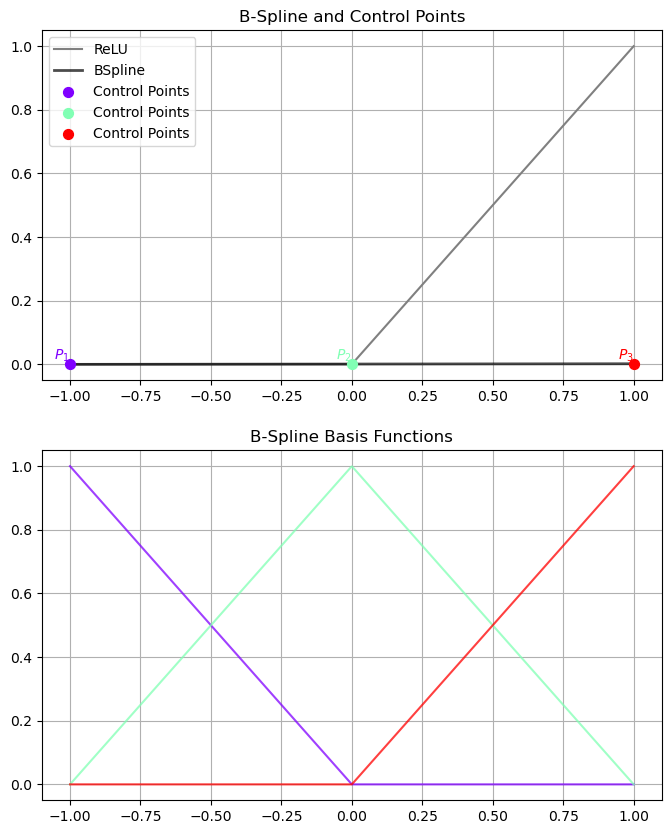

In [4]:
import importlib
importlib.reload(utils)

layer = 0
sel = 3

print(layer_locs[layer][sel])
print(layer_coeffs[layer][sel])

utils.plot_bspline(layer_locs[layer][sel], layer_coeffs[layer][sel])

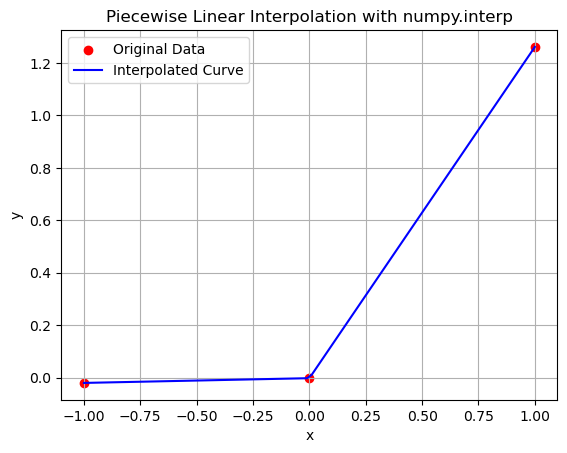

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = final_locs[sel]
y = final_coeffs[sel]

x_new = np.linspace(x.min(), x.max(), 100)

y_new = np.interp(x_new, x, y)
plt.scatter(x, y, color='red', label='Original Data')
plt.plot(x_new, y_new, color='blue', label='Interpolated Curve')

plt.title('Piecewise Linear Interpolation with numpy.interp')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from datetime import datetime
from sklearn.datasets import fetch_california_housing
from regression6 import Config, training_run


# Load the data
housing = fetch_california_housing()
X, y = housing.data, housing.target

mparams = Config(
    layers = [8],
    cpoints = 3,
    range_ = 1,
)
        
tparams = Config(
    relu_epochs = 200,
    bspline_epochs = 50,
    both_epochs = 0,
    lspline_epochs = 0,
    
    batch_size = 10,
    lr_wb = 0.001,
    lr_bs = 0.0001,
    lr_ls = 0.0001,
    lrs = "none",
    lrs_gamma = .9,
    lrs_stepsize = 5,
    comp_relu = 0,
    bspline_order = ["bspline", "both"],
)

print("Init complete.")

start_time = datetime.now()
model, train_history, val_history, train_times, cr_val_history, cr_train_history, cr_train_times = training_run(mparams, tparams, X, y)

Init complete.


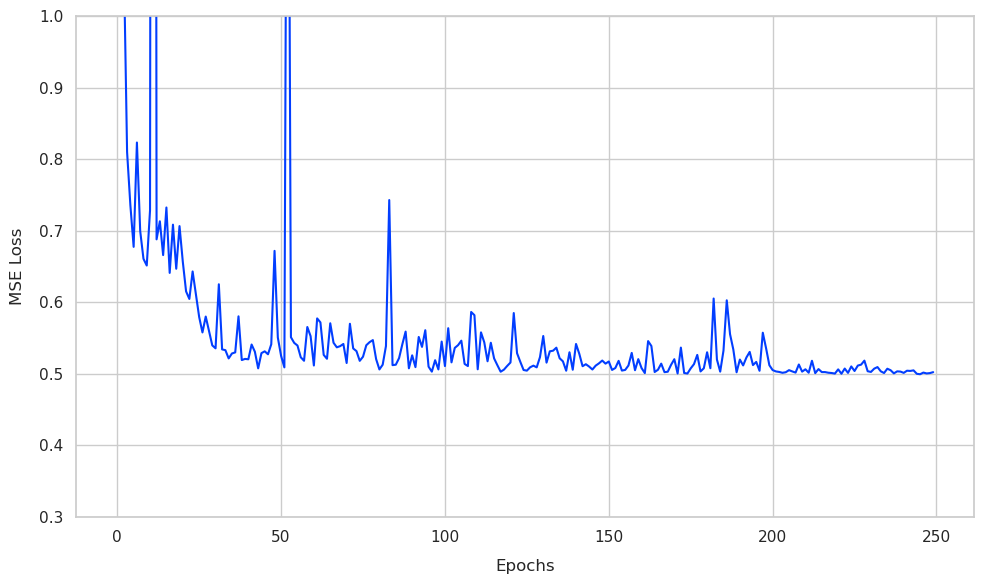

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import accumulate
import numpy as np

sns.set_theme(style="whitegrid", palette="bright")

plot_data = []

values = np.array(val_history)

x = "epochs"

for idx, l in enumerate(values):
    plot_data.append({
        "Epoch": idx,
        "MSE Loss": l,
    })

# Convert to DataFrame
df = pd.DataFrame(plot_data)

# Plotting with Seaborn
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=df, x="Epoch", y="MSE Loss", markers=False)
ax.set_xlabel("Epochs", labelpad=10)
ax.set_ylabel("MSE Loss", labelpad=10)

ax.set_ylim(.3, 1)

# Display the plot
plt.tight_layout()
plt.show()

In [20]:
print(model.get_layers())

Sequential(
  (0): Linear(in_features=8, out_features=8, bias=True)
  (1): DeepBSpline(mode=fc, num_activations=8, init=relu, size=3, grid=1.0.)
  (2): Linear(in_features=8, out_features=1, bias=True)
)
